In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [26]:
grid_size = (10, 10)
rewards = np.zeros(grid_size)
rewards[0, 8] = -500
rewards[8, 6] = -100
rewards[5, 9] = 1000
illegal_positions = {(1, 2), (2, 2), (3, 2), (4, 2), (3, 6), (4, 6), (5, 6), (6, 6), (5, 7), (6, 7)}
terminal_pos = {(5, 9)}

In [27]:
num_states = np.prod(grid_size)
num_actions = 5  # Add a "Wait" action
Q_shared = np.random.rand(num_states, num_actions)

In [28]:
learning_rate = 0.1
discount = 0.9
epochs = 3000
convergence_threshold = 1e-6

In [29]:
sartingposition = [(0, i) for i in range(2)] + [(9, i) for i in range(2)]
error_rates = []
convergence_time = None
Qvalues_episodes = []

In [30]:
f2_house = 0.35
epsilon = 0.01  
Qvalues_episodes = []

In [31]:
episodes_to_catch_robber = []


In [32]:
for epoch in range(epochs):
    start_pos = random.choice(sartingposition)
    start_pos2 = random.choice(sartingposition)
    hunter_pos = start_pos
    asist_pos = start_pos2
    robber_position = (5, 9)  
    Qvalues_episodes.append(np.copy(Q_shared))
    
    total_reward = 0

    while hunter_pos not in terminal_pos or asist_pos not in terminal_pos:

        robber_position = (8, 6)  
        if hunter_pos == robber_position or asist_pos == robber_position:
            total_reward += 1000  
            break

        if hunter_pos == robber_position or asist_pos == robber_position:
           episodes_to_catch_robber.append(epochs)
           print(f"Robber caught in episode {epochs}")
           break

        
        current_q_index1 = hunter_pos[0] * grid_size[1] + hunter_pos[1]
        current_q_index2 = asist_pos[0] * grid_size[1] + asist_pos[1]

        
        if random.random() < epsilon:
            move_hunter = random.choice(range(5))  # Choose a random action
            move_assist = random.choice(range(5))
        else:
            move_hunter = np.argmax(Q_shared[current_q_index1])  
            move_assist = np.argmax(Q_shared[current_q_index2])
        
        actions = [(0, -1), (-1, 0), (1, 0), (0, 1), (0, 0)]  
        new_poshunter = (hunter_pos[0] + actions[move_hunter][0], hunter_pos[1] + actions[move_hunter][1])

        
        if (
            new_poshunter[0] < 0 or new_poshunter[0] >= grid_size[0] or
            new_poshunter[1] < 0 or new_poshunter[1] >= grid_size[1] or
            new_poshunter in illegal_positions
        ):
            new_poshunter = hunter_pos

        new_pos_assistant = (asist_pos[0] + actions[move_assist][0], asist_pos[1] + actions[move_assist][1])

        
        if (
            new_pos_assistant[0] < 0 or new_pos_assistant[0] >= grid_size[0] or
            new_pos_assistant[1] < 0 or new_pos_assistant[1] >= grid_size[1] or
            new_pos_assistant in illegal_positions
        ):
            new_pos_assistant = asist_pos

        
        Q_values1 = Q_shared[current_q_index1][move_hunter]
        Q_values2 = Q_shared[current_q_index2][move_assist]

        
        if random.random() < f2_house:
            
            robber_position = (5, 2)
        else:
           
            possible_moves = [
                (robber_position[0] - 1, robber_position[1]),
                (robber_position[0], robber_position[1] - 1),
                (robber_position[0] + 1, robber_position[1]),
                (robber_position[0], robber_position[1] + 1),
            ]
            possible_moves = [
                move
                for move in possible_moves
                if (
                    move[0] >= 0
                    and move[0] < grid_size[0]
                    and move[1] >= 0
                    and move[1] < grid_size[1]
                    and move not in illegal_positions
                )
            ]
            
            robber_position = random.choice(possible_moves)

        
        if hunter_pos == robber_position:
            break

        if asist_pos == robber_position:
            break

        
        new_state_reward1 = rewards[new_poshunter[0], new_poshunter[1]]
        new_state_reward2 = rewards[new_pos_assistant[0], new_pos_assistant[1]]

        
        Q_shared[current_q_index1][move_hunter] += learning_rate * (
            new_state_reward1
            + discount * np.max(Q_shared[new_poshunter[0] * grid_size[1] + new_poshunter[1]])
            - Q_values1
        )

        Q_shared[current_q_index2][move_assist] += learning_rate * (
            new_state_reward2
            + discount * np.max(Q_shared[new_pos_assistant[0] * grid_size[1] + new_pos_assistant[1]])
            - Q_values2
        )

        
        hunter_pos = new_poshunter
        asist_pos = new_pos_assistant

    Qvalues_episodes.append(Q_shared[current_q_index1])

    if epoch > 0:
        
        error_rate = np.mean(np.abs(Q_shared - Q_shared_old))
        error_rates.append(error_rate)

        if error_rate < convergence_threshold and convergence_time is None:
            convergence_time = epoch

    Q_shared_old = np.copy(Q_shared)

In [33]:
if hunter_pos == robber_position or asist_pos == robber_position:
    print("The robber has been caught!")
else:
    print("The robber got away.")

The robber got away.


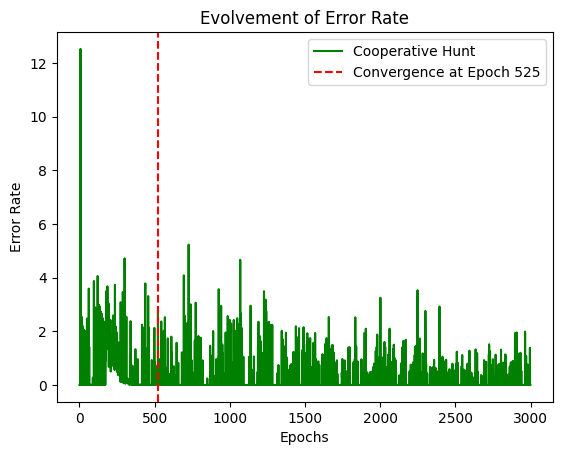

In [34]:
plt.plot(error_rates, color='green', linestyle='-', label='Cooperative Hunt')
plt.title("Evolvement of Error Rate")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")

if convergence_time is not None:
    plt.axvline(x=convergence_time, color='red', linestyle='--', label=f'Convergence at Epoch {convergence_time}')
plt.legend()
plt.show()
